In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import matplotlib.dates as mdates
import nltk
from nltk.tokenize import word_tokenize

In [61]:
tweet2021 = pd.read_csv('tweets-2021-analiza.csv')
tweet2021

,TweetID,Text,UserID,likeCount,lang,hastags,coordinates,place,date,time,CleanedText,Tokenize,POS_tagged,Lemma,Textblob_Polarity,Textblob_Analysis,Vader_Sentiment,Vader_Analysis,Afinn_Sentiment,Afinn_Analysis
0,1509680944877350915,"covid is over for 95% of people world wide , you should stay at your home if your covid freak, keep in mind that many deadly virus will be coming out from the permafrost melting, because of the climate change , and you will soon realize that covid Was just a cough. #CovidIsOver",1473294615109320711,0,en,['CovidIsOver'],NaN,NaN,2022-03-31,23:56,covid is over for of people world wide you should stay at your home if your covid freak keep in mind that many deadly virus will be coming out from the permafrost melting because of the climate change and you will soon realize that covid was just a cough covidisover,"['covid', 'is', 'over', 'for', 'of', 'people', 'world', 'wide', 'you', 'should', 'stay', 'at', 'your', 'home', 'if', 'your', 'covid', 'freak', 'keep', 'in', 'mind', 'that', 'many', 'deadly', 'virus', 'will', 'be', 'coming', 'out', 'from', 'the', 'permafrost', 'melting', 'because', 'of', 'the', 'climate', 'change', 'and', 'you', 'will', 'soon', 'realize', 'that', 'covid', 'was', 'just', 'a', 'cough', 'covidisover']","[('covid', 'n'), ('people', 'n'), ('world', 'n'), ('wide', 'a'), ('stay', 'v'), ('home', 'n'), ('covid', 'n'), ('freak', 'n'), ('keep', 'v'), ('mind', 'n'), ('many', 'a'), ('deadly', 'r'), ('virus', 'v'), ('coming', 'v'), ('permafrost', 'n'), ('melting', 'n'), ('climate', 'n'), ('change', 'n'), ('soon', 'r'), ('realize', 'v'), ('covid', 'n'), ('cough', 'n'), ('covidisover', 'n')]",covid people world wide stay home covid freak keep mind many deadly virus come permafrost melting climate change soon realize covid cough covidisover,0.066667,Positive,-0.4404,Negative,-5.0,Negative
1,1509680414582980608,"Daniel Andrews quoted these exact words;\n ""But it's only with three doses that you'll be prevented not just from serious illness, but from GETTING this virus"". \nNek Minit, Dan's got Covid. \nWake up and get fkn angry people. \nYou've been duped, big time. \nmRNA is a dud.",1464862641483137025,7,en,NaN,NaN,NaN,2022-03-31,23:53,daniel andrews quoted these exact words but it's only with three doses that you'll be prevented not just from serious illness but from getting this virus nek minit dan's got covid wake up and get fkn angry people you've been duped big time mrna is a dud,"['daniel', 'andrews', 'quoted', 'these', 'exact', 'words', 'but', ""it's"", 'only', 'with', 'three', 'doses', 'that', ""you'll"", 'be', 'prevented', 'not', 'just', 'from', 'serious', 'illness', 'but', 'from', 'getting', 'this', 'virus', 'nek', 'minit', ""dan's"", 'got', 'covid', 'wake', 'up', 'and', 'get', 'fkn', 'angry', 'people', ""you've"", 'been', 'duped', 'big', 'time', 'mrna', 'is', 'a', 'dud']","[('daniel', 'n'), ('andrews', 'n'), ('quoted', 'v'), ('exact', 'a'), ('words', 'n'), ('three', None), ('doses', 'n'), ('prevented', 'v'), ('serious', 'a'), ('illness', 'n'), ('getting', 'v'), ('virus', 'n'), ('nek', 'a'), ('minit', 'n'), (""dan's"", 'n'), ('got', 'v'), ('covid', 'n'), ('wake', 'v'), ('get', 'v'), ('fkn', 'a'), ('angry', 'a'), ('people', 'n'), ('duped', 'v'), ('big', 'a'), ('time', 'n'), ('mrna', 'n'), ('dud', 'n')]",daniel andrew quote exact word three dos prevent serious illness get virus nek minit dan's get covid wake get fkn angry people dupe big time mrna dud,-0.145833,Negative,-0.8658,Negative,-9.0,Negative
2,1509680355392978947,"Greeting,people! Eating eggtarts is a essential activity of lockdown life in order to not go crazy during covid time, Mum once told me a story: Alex, who is a nurse, they saved a village from the deadly virus, and they took care of people who got sick",1429571873780637700,0,en,NaN,NaN,NaN,2022-03-31,23:53,greeting people eating eggtarts is a essential activity of lockdown life in order to not go crazy during covid time mum once told me a story alex who is a nurse they sav

In [62]:
#tweet2021['date'] = tweet2021.date.date
tweet2021['date'] =  pd.to_datetime(tweet2021['date'])
tweet2021['date']


0        2022-03-31
1        2022-03-31
2        2022-03-31
3        2022-03-31
4        2022-03-31
            ...    
417279   2021-01-01
417280   2021-01-01
417281   2021-01-01
417282   2021-01-01
417283   2021-01-01
Name: date, Length: 417284, dtype: datetime64[ns]

In [63]:
#ilość tweetów w poszczególnych dniach
tweet_per_day = tweet2021['date'].value_counts().sort_index()
#ile najwiecej tweetow 
tweet_per_day_count = tweet2021['date'].value_counts()
tweet_per_day_count

2021-01-04    2288
2021-01-26    2243
2021-01-20    2243
2021-01-05    2214
2021-01-21    2186
              ... 
2022-03-19     289
2022-03-06     281
2022-03-27     280
2022-03-28     278
2022-03-26     258
Name: date, Length: 455, dtype: int64

In [64]:
sma10_tweet_per_day = tweet_per_day.rolling(window=10).mean() #średnia krocząca z 10 dni
sma10_tweet_per_day

2021-01-01      NaN
2021-01-02      NaN
2021-01-03      NaN
2021-01-04      NaN
2021-01-05      NaN
              ...  
2022-03-27    331.4
2022-03-28    324.9
2022-03-29    336.7
2022-03-30    341.2
2022-03-31    345.4
Name: date, Length: 455, dtype: float64

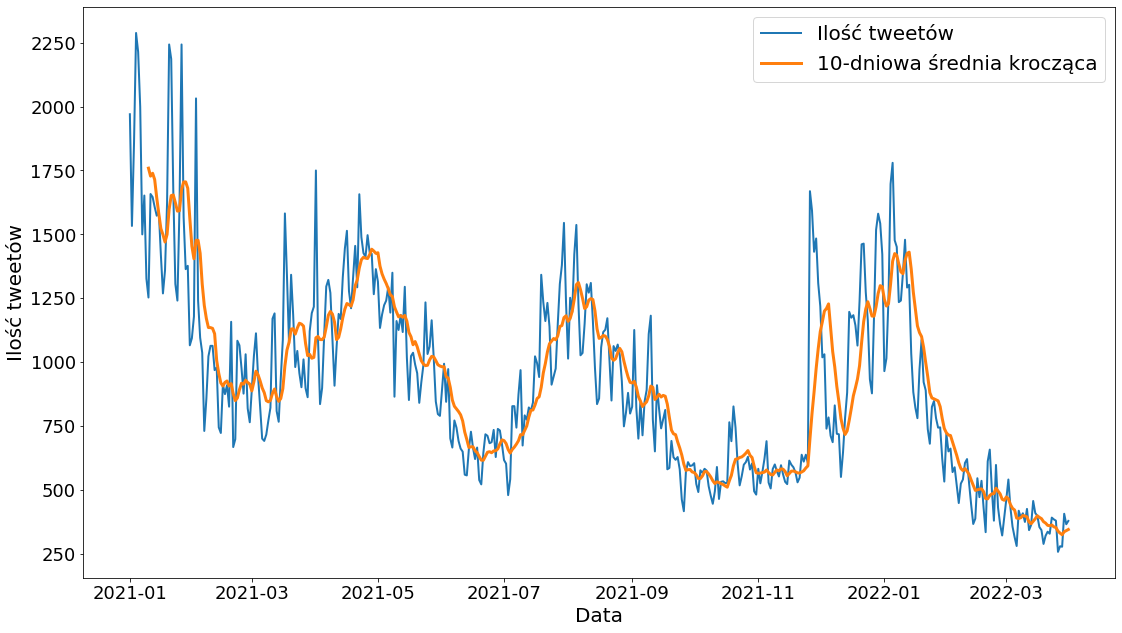

In [72]:
plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(tweet_per_day, label='Ilość tweetów', linewidth = 2) 
plt.plot(sma10_tweet_per_day, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=20) #nazwanie osi x
plt.ylabel('Ilość tweetów', fontsize=20) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.savefig("ilosc_tweetow_2021.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

In [33]:
vader_counts = tweet2021.Vader_Analysis.value_counts()
afinn_counts = tweet2021.Afinn_Analysis.value_counts()
textblob_counts = tweet2021.Textblob_Analysis.value_counts()

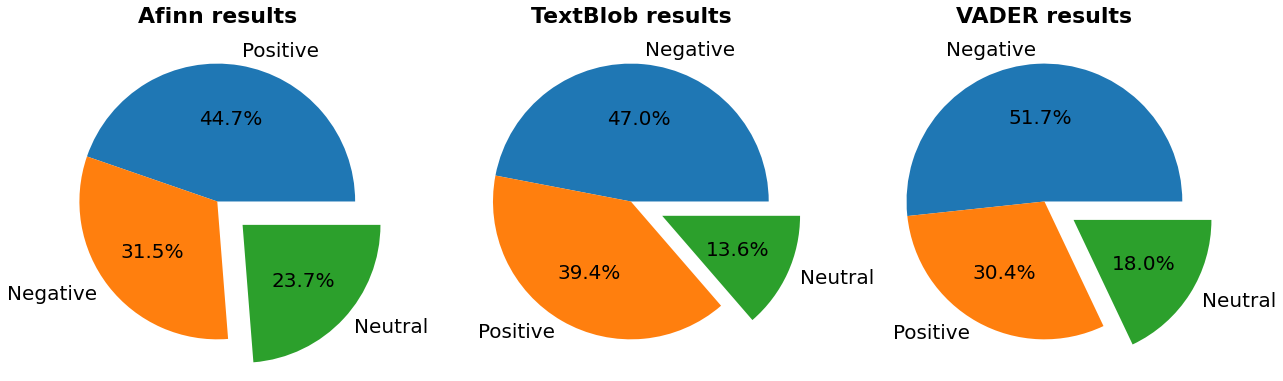

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(21,10))
plt.subplot(1,3,1)
plt.title("Afinn results", fontsize=22, fontweight="bold")
plt.pie(textblob_counts.values, labels = textblob_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.subplot(1,3,2)
plt.title("TextBlob results", fontsize=22, fontweight="bold")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.subplot(1,3,3)
plt.title("VADER results", fontsize=22, fontweight="bold")
plt.pie(afinn_counts.values, labels = afinn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.savefig("porownanie_2021.pdf", dpi=300, bbox_inches='tight')

## AFINN

In [74]:
#średni wydzwięk uzyskany z Afinn
grouped_mean_Afinn = tweet2021.groupby('date')['Afinn_Sentiment'].mean()

In [75]:
sma10_Afinn = grouped_mean_Afinn.rolling(window=10).mean() #średnia krocząca z 10 dni
sma10_Afinn

date
2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04         NaN
2021-01-05         NaN
                ...   
2022-03-27   -1.593802
2022-03-28   -1.556542
2022-03-29   -1.544773
2022-03-30   -1.512009
2022-03-31   -1.497246
Name: Afinn_Sentiment, Length: 455, dtype: float64

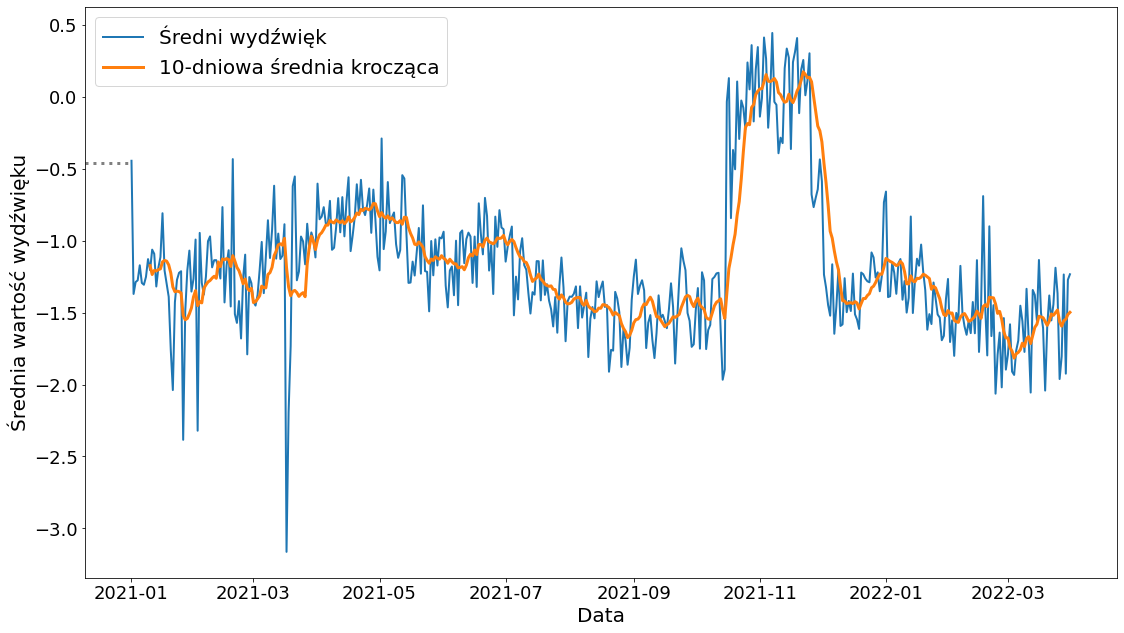

In [76]:
plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(grouped_mean_Afinn, label='Średni wydźwięk', linewidth = 2) 
plt.plot(sma10_Afinn, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=20) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=20) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=-0.46, xmax=0.045, linestyle='dotted', linewidth= 3, color='gray')
plt.savefig("AFINN_2021.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

## TextBlob

In [77]:
#średni wydzwięk uzyskany z Textblob
grouped_mean_Textblob = tweet2021.groupby('date')['Textblob_Polarity'].mean()

In [78]:
grouped_mean_Textblob

date
2021-01-01    0.056382
2021-01-02    0.027305
2021-01-03    0.035660
2021-01-04    0.019699
2021-01-05    0.024733
                ...   
2022-03-27    0.004050
2022-03-28    0.039597
2022-03-29   -0.034967
2022-03-30    0.007205
2022-03-31   -0.008559
Name: Textblob_Polarity, Length: 455, dtype: float64

In [79]:
sma10_Textblob = grouped_mean_Textblob.rolling(window=10).mean() #średnia krocząca z 10 dni
sma10_Textblob

date
2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04         NaN
2021-01-05         NaN
                ...   
2022-03-27   -0.003341
2022-03-28   -0.000251
2022-03-29   -0.002343
2022-03-30   -0.000227
2022-03-31   -0.002124
Name: Textblob_Polarity, Length: 455, dtype: float64

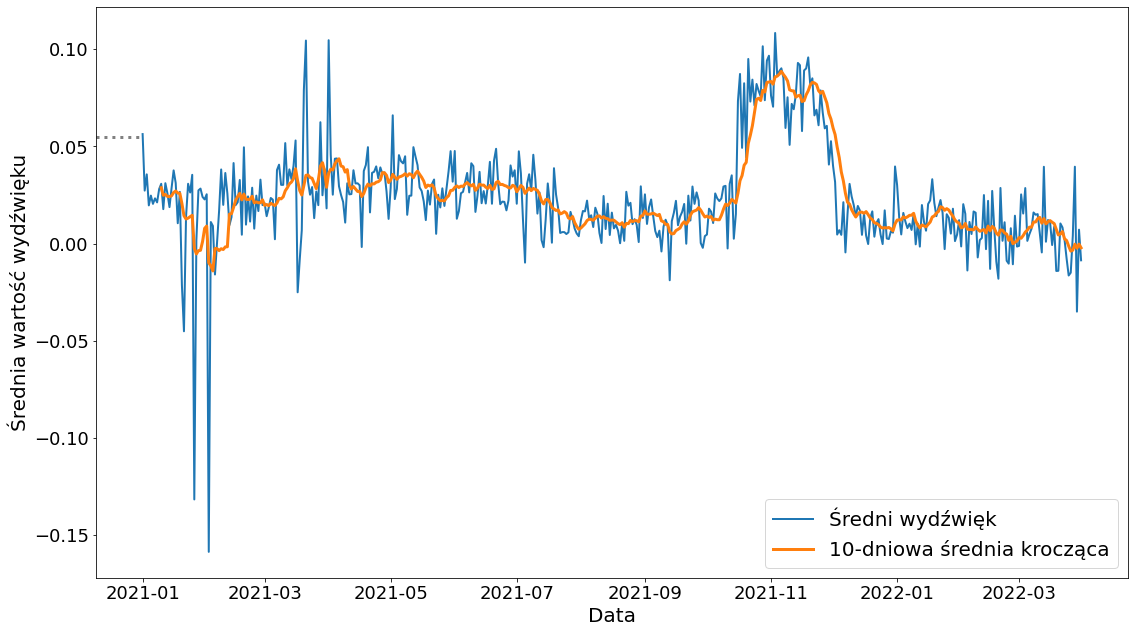

In [80]:
plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(grouped_mean_Textblob, label='Średni wydźwięk', linewidth = 2)
plt.plot(sma10_Textblob, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=20) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=20) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0.055, xmax=0.045, linestyle='dotted', linewidth= 3, color='gray')
plt.savefig("Textblob_2021.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

In [81]:
#średni wydzwięk uzyskany z VADER
grouped_mean_Vader = tweet2021.groupby('date')['Vader_Sentiment'].mean()

In [82]:
sma10_Vader = grouped_mean_Vader.rolling(window=10).mean() #średnia krocząca z 10 dni
sma10_Vader

date
2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04         NaN
2021-01-05         NaN
                ...   
2022-03-27   -0.077217
2022-03-28   -0.069916
2022-03-29   -0.069893
2022-03-30   -0.064704
2022-03-31   -0.058547
Name: Vader_Sentiment, Length: 455, dtype: float64

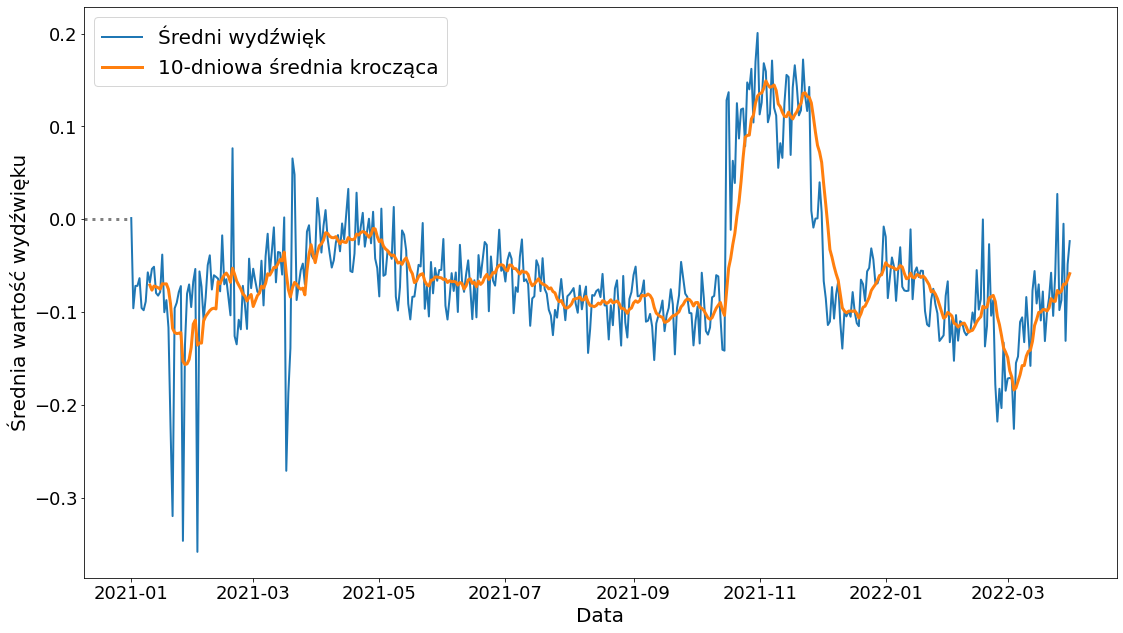

In [86]:
plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(grouped_mean_Vader, label='Średni wydźwięk', linewidth = 2) 
plt.plot(sma10_Vader, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=20) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=20) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0, xmax=0.045, linestyle='dotted', linewidth= 3, color='gray')
plt.savefig("VADER_2021.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

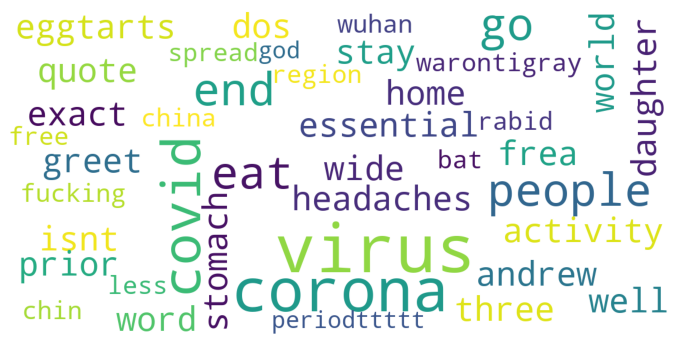

In [16]:
#stworzenie własnych stopwords, które nie będą uwzględniane w wizualizacji
customStopwords=list(STOPWORDS)+ ['dtype', 'object', 'yro', 'pre', 'cra', 'yay', 'btc', 'dr', 'Lemma', 'gu', 'na', 'per', 'oh', 's', 'daniel', 'length', 'name']

def show_wordcloud(data):
    wordcloud = WordCloud(
        collocations=False, # nie uwzględnia kolokacji (bigramy) dwóch słów
        background_color='white', #kolor tła
        stopwords=customStopwords, #słowa które nie będą brane pod uwagę
        max_words=300, # mksymalna liczba słów
        max_font_size=40,  #rozmiar czcionki
        scale=3 #skalowanie między obliczeniami a rysowaniem
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.savefig("chmura2021.pdf", dpi=300, bbox_inches='tight')
    plt.show()


show_wordcloud(tweet2021['Lemma'])

# Użytkownik z największą ilością tweetów

In [84]:
#ilość tweetów dla każdego użytkownika
tweet2021['UserID'].value_counts()

1356000021985034248    6401
1232373728761319426    5037
976098246882885634     4894
1086281855782014976    2718
1372805012             1467
                       ... 
2310662821                1
25564328                  1
1067447035551465474       1
2890452576                1
947261144837877761        1
Name: UserID, Length: 269248, dtype: int64

In [85]:
#wybór użytkownika który najwięcej tweetował
firstUser = tweet2021[tweet2021.UserID == 1356000021985034248]

In [38]:
firstUser

,TweetID,Text,UserID,likeCount,lang,hastags,coordinates,place,date,time,CleanedText,Tokenize,POS_tagged,Lemma,Textblob_Polarity,Textblob_Analysis,Vader_Sentiment,Vader_Analysis,Afinn_Sentiment,Afinn_Analysis
40394,1481723944088465409,The COVID-19 Pandemic has not been nice to man...,1356000021985034248,0,en,NaN,NaN,NaN,2022-01-13,20:24,the covid pandemic has not been nice to man...,"[the, covid, pandemic, has, not, been, nice, t...","[('covid', 'n'), ('pandemic', 'n'), ('nice', '...",covid pandemic nice many people hint visit p...,0.287500,Positive,0.7430,Positive,5.0,Positive
86046,1467470259091247108,The epidemic has not been delightful to many p...,1356000021985034248,0,en,NaN,NaN,NaN,2021-12-05,12:25,the epidemic has not been delightful to many p...,"[the, epidemic, has, not, been, delightful, to...","[('epidemic', 'n'), ('delightful', 'a'), ('man...",epidemic delightful many people hint visit p...,0.387500,Positive,0.8074,Positive,5.0,Positive
89237,1466184110544605184,The epidemic has not been welcoming to many pe...,1356000021985034248,0,en,NaN,NaN,NaN,2021-12-01,23:15,the epidemic has not been welcoming to many pe...,"[the, epidemic, has, not, been, welcoming, to,...","[('epidemic', 'n'), ('welcoming', 'v'), ('many...",epidemic welcome many people hint visit ther...,0.337500,Positive,0.7579,Positive,4.0,Positive
89252,1466181564421705731,The epidemic has not been pleasant to many peo...,1356000021985034248,0,en,NaN,NaN,NaN,2021-12-01,23:04,the epidemic has not been pleasant to many peo...,"[the, epidemic, has, not, been, pleasant, to, ...","[('epidemic', 'n'), ('pleasant', 'a'), ('many'...",epidemic pleasant many people hint visit the...,0.320833,Positive,0.7783,Positive,5.0,Positive
89259,1466179065895735296,The COVID-19 Pandemic has not been nice to man...,1356000021985034248,0,en,NaN,NaN,NaN,2021-12-01,22:55,the covid pandemic has not been nice to man...,"[the, covid, pandemic, has, not, been, nice, t...","[('covid', 'n'), ('pandemic', 'n'), ('nice', '...",covid pandemic nice many people reminder vis...,0.287500,Positive,0.7430,Positive,5.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122085,1449222372616118278,The epidemic has not been pleasant to many peo...,1356000021985034248,0,en,NaN,NaN,NaN,2021-10-16,03:55,the epidemic has not been pleasant to many peo...,"[the, epidemic, has, not, been, pleasant, to, ...","[('epidemic', 'n'), ('pleasant', 'a'), ('many'...",epidemic pleasant many people hint visit the...,0.320833,Positive,0.7783,Positive,5.0,Positive
122086,1449222294044168198,The Corona Virus Pandemic has not been nice to...,1356000021985034248,0,en,NaN,NaN,NaN,2021-10-16,03:54,the corona virus pandemic has not been nice to...,"[the, corona, virus, pandemic, has, not, been,...","[('corona', 'n'), ('virus', 'n'), ('pandemic',...",corona virus pandemic nice many people hint ...,0.191667,Positive,0.7430,Positive,5.0,Positive
122087,1449222249458724867,The Corona Virus Pandemic has not been nice to...,1356000021985034248,0,en,NaN,NaN,NaN,2021-10-16,03:54,the corona virus pandemic has not been nice to...,"[the, corona, virus, pandemic, has, not, been,...","[('corona', 'n'), ('virus', 'n'), ('pandemic',...",corona virus pandemic nice many people hint ...,0.287500,Positive,0.7430,Positive,5.0,Positive
122088,1449222202176401414,The Corona Virus Pandemic has not been pleasan...,1356000021985034248,0,en,NaN,NaN,NaN,2021-10-16,03:54,the corona virus pandemic has not been pleasan...,"[the, corona, virus, pandemic, has, not, been,...","[('corona', 'n'), ('virus', 'n'), ('pandemic',...",corona virus pandemic pleasant many people r...,0.320833,Positive,0.7783,Positive,5.0,Positive


In [40]:
afinn_counts = firstUser.Afinn_Analysis.value_counts()
afinn_counts

Positive    6401
Name: Afinn_Analysis, dtype: int64

In [41]:
vader_counts = firstUser.Vader_Analysis.value_counts()
vader_counts

Positive    6401
Name: Vader_Analysis, dtype: int64

In [42]:
textblob_counts = firstUser.Textblob_Analysis.value_counts()
textblob_counts

Positive    6401
Name: Textblob_Analysis, dtype: int64